Import required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("data.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


selection of attributes for clustering

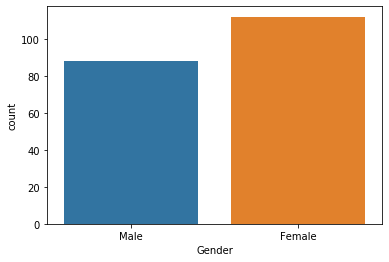

In [7]:
sns.countplot(data = df ,x = "Gender")

In [8]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [10]:
def percentage(a,b):
    z = (a/(a+b))*100
    zz = (b/(a+b))*100
    print ( "Percentage of males in above cluster : ",z)
    print ( "Percentage of females in above cluster : ",zz)
percentage (88,112)

Percentage of males in above cluster :  44.0
Percentage of females in above cluster :  56.00000000000001


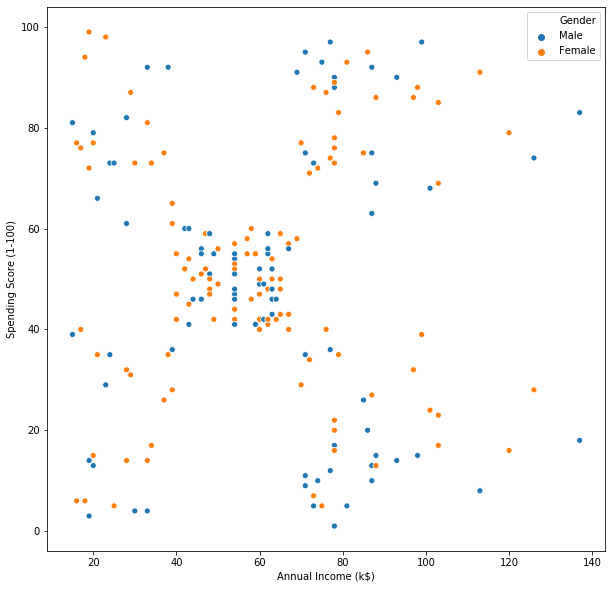

In [11]:
plt.figure(figsize = ((10,10)))
sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)" , data = df , hue = "Gender" )

In [12]:
x = df.iloc[:,[3,4]].values

In [13]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# K-Means Clustering

wcss curve to find out no of clusters 

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i , init = "k-means++" , max_iter = 300, n_init = 10 )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    # inertia bcoz of wcss 

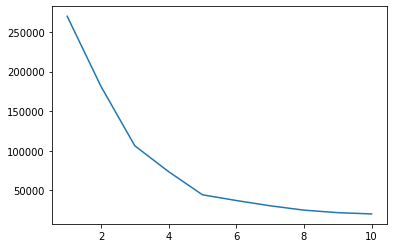

In [16]:
plt.plot(range(1,11),wcss)

training and predicting stage of the machine

In [17]:
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(x)

In [18]:
y_kmeans

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

Visualization  of the scatter plot 

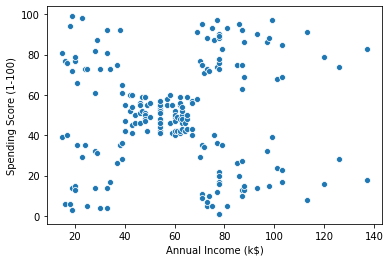

In [19]:
sns.scatterplot (x ="Annual Income (k$)", y = "Spending Score (1-100)", data = df )

Visualization  of the scatter plot on clusters 
y_means == 0(cluster_number),0( array index)

Text(0, 0.5, 'Spending score ')

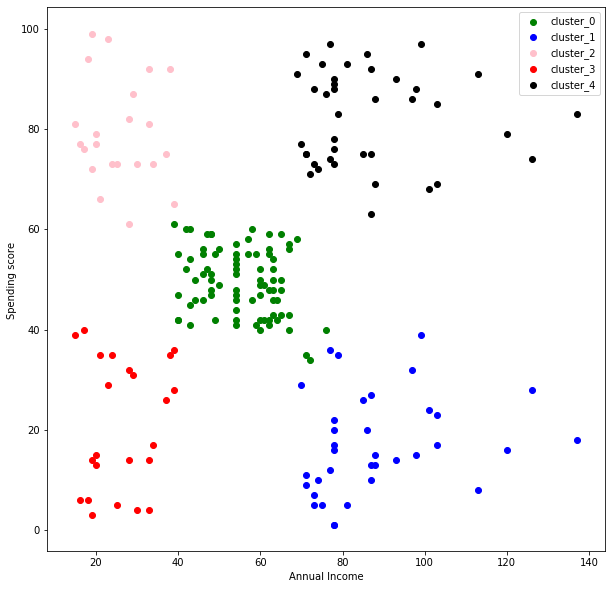

In [20]:
plt.figure(figsize=((10,10)))
plt.scatter (x = x[y_kmeans == 0,0], y = x[y_kmeans == 0,1], c = 'green', label = 'cluster_0' )
plt.scatter (x = x[y_kmeans == 1,0], y = x[y_kmeans == 1,1], c = 'blue', label = 'cluster_1' )
plt.scatter (x = x[y_kmeans == 2,0], y = x[y_kmeans == 2,1], c = 'pink', label = 'cluster_2' )
plt.scatter (x = x[y_kmeans == 3,0], y = x[y_kmeans == 3,1], c = 'red', label = 'cluster_3' )
plt.scatter (x = x[y_kmeans == 4,0], y = x[y_kmeans == 4,1], c = 'black', label = 'cluster_4' )
plt.legend()
plt.xlabel("Annual Income")
plt.ylabel("Spending score ")

In [34]:
from sklearn import*

The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters

In [35]:
metrics.silhouette_score(x, y_kmeans, metric='euclidean')

0.5546571631111091

If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

In [36]:
from sklearn.metrics import davies_bouldin_score
metrics.davies_bouldin_score(x, y_kmeans)

0.5722356162263351

d is high for a good cluster


# DBSCAN Clustering

In [48]:
import numpy as np
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [49]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

In [50]:
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

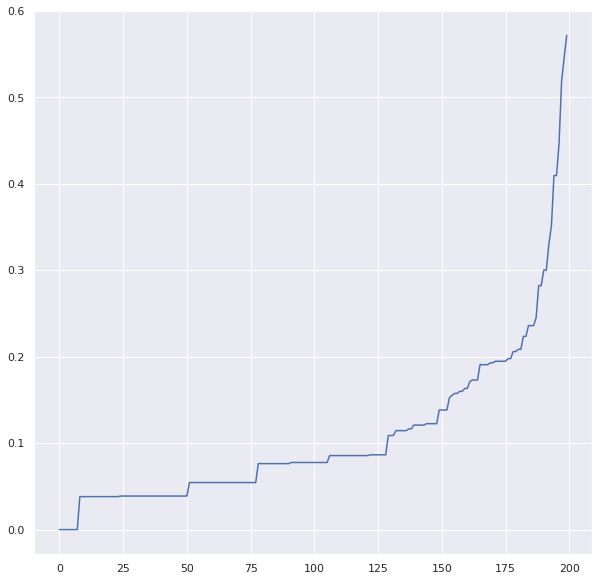

In [51]:
plt.figure(figsize = (10,10))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [52]:
m = DBSCAN(eps=0.3, min_samples=5)
m.fit(x)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [58]:
clusters

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1, -1,  2, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  6,  4,  6,  4,  6, -1,
        6,  4,  6,  4,  6,  4,  6,  4,  6,  4, -1,  4,  6,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [53]:
clusters = m.labels_

In [54]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

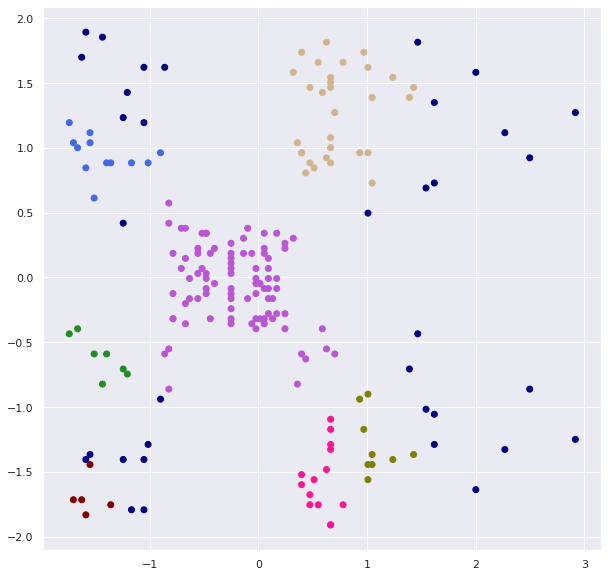

In [55]:
plt.figure(figsize = (10,10))
plt.scatter(x[:,0], x[:,1], c=vectorizer(clusters))  

Text(0, 0.5, 'Feature 1')

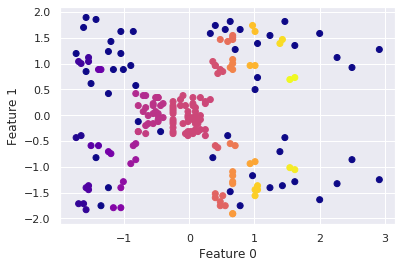

In [75]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(x[:, 0], x[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

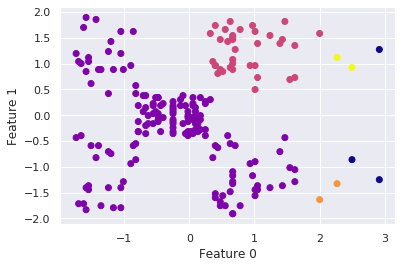

In [76]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.5, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(x[:, 0], x[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
from sklearn import*

In [59]:
metrics.silhouette_score(x, clusters, metric='euclidean')

0.31614121976731185

In [60]:
from sklearn.metrics import davies_bouldin_score
metrics.davies_bouldin_score(x, clusters)

2.0250698034375643

# Hierarchical clustering


In [262]:
!pip install scipy

     |████████████████████████████████| 26.1 MB 2.7 MB/s eta 0:00:01    |████████████▎                   | 10.0 MB 76 kB/s eta 0:03:30
     |████████████████████████████████| 20.1 MB 2.1 MB/s eta 0:00:01     |████████▉                       | 5.5 MB 901 kB/s eta 0:00:17


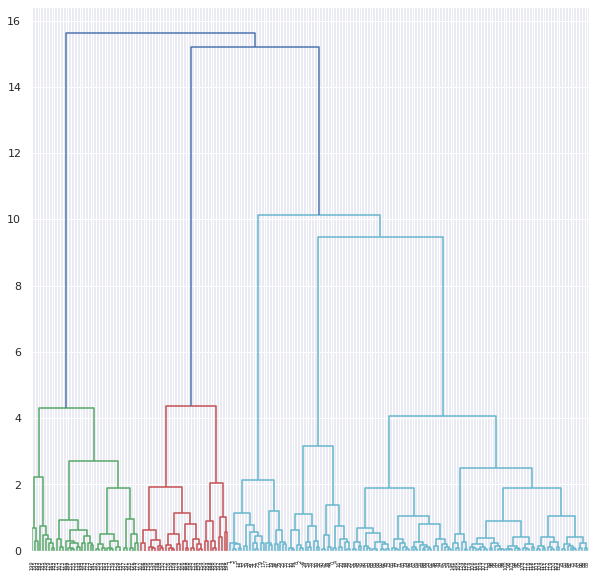

In [63]:
plt.figure ( figsize =((10,10)))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x,method = 'ward'))


In [64]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters = 5 , affinity = "euclidean")
y_hc = agg.fit_predict(x)

In [65]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

Text(0, 0.5, 'Spending score ')

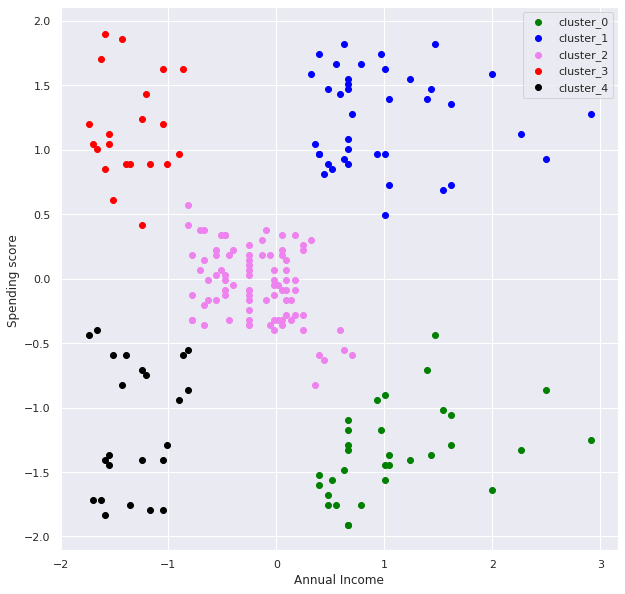

In [77]:
plt.figure(figsize=((10,10)))
plt.scatter (x = x[y_hc == 0,0], y = x[y_hc == 0,1], c = 'green', label = 'cluster_0')
plt.scatter (x = x[y_hc == 1,0], y = x[y_hc == 1,1], c = 'blue', label = 'cluster_1' )
plt.scatter (x = x[y_hc == 2,0], y = x[y_hc == 2,1], c = 'violet', label = 'cluster_2' )
plt.scatter (x = x[y_hc == 3,0], y = x[y_hc == 3,1], c = 'red', label = 'cluster_3' )
plt.scatter (x = x[y_hc == 4,0], y = x[y_hc == 4,1], c = 'black', label = 'cluster_4' )
plt.legend()
plt.xlabel("Annual Income")
plt.ylabel("Spending score ")

In [66]:
metrics.silhouette_score(x, y_hc, metric='euclidean')

0.5538089226688662

In [67]:
from sklearn.metrics import davies_bouldin_score
metrics.davies_bouldin_score(x, y_hc)

0.5778621190740153

# Cluster_1 analysis

In [79]:
cluster_1 = df[y_hc == 1]
cluster_1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
123,124,Male,39,69,91
125,126,Female,31,70,77
127,128,Male,40,71,95
129,130,Male,38,71,75
131,132,Male,39,71,75


In [80]:
cluster_1["Gender"].value_counts()

Female    21
Male      18
Name: Gender, dtype: int64

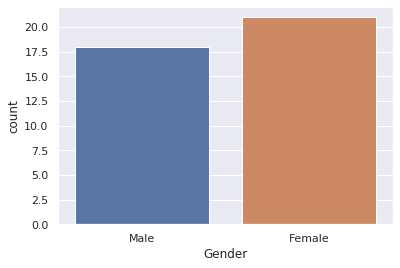

In [81]:
sns.countplot(data = cluster_1,x = "Gender")

In [82]:
percentage(18,21)

Percentage of males in above cluster :  46.15384615384615
Percentage of females in above cluster :  53.84615384615385


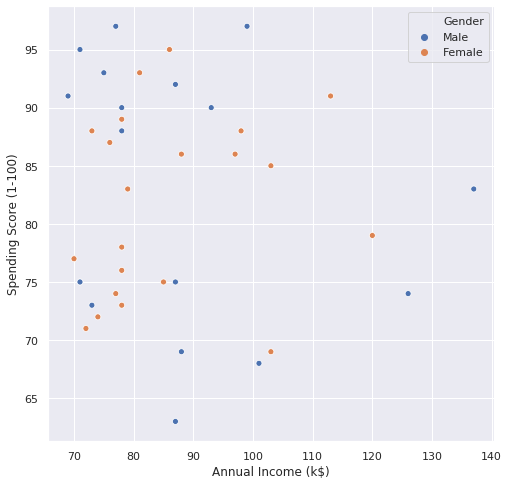

In [83]:
plt.figure(figsize=((8,8)))
sns.scatterplot(x = "Annual Income (k$)",y = "Spending Score (1-100)",data = cluster_1,hue='Gender')

# cluster_3 analysis

In [102]:
cluster_3 = df[y_hc == 3]
cluster_3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72


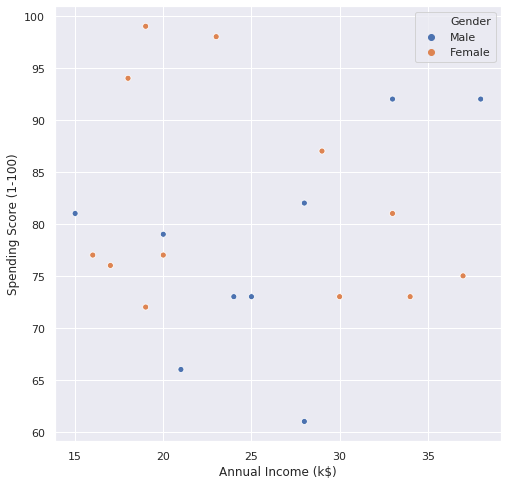

In [103]:
plt.figure(figsize = ((8,8)))
sns.scatterplot( x = "Annual Income (k$)", y = "Spending Score (1-100)", data = cluster_4, hue = "Gender")

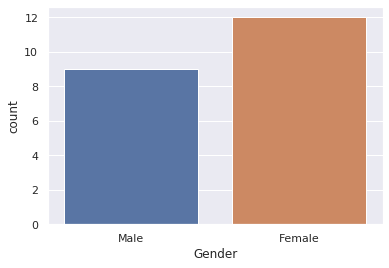

In [104]:
sns.countplot(x = "Gender", data = cluster_3)

In [107]:
cluster_3["Gender"].value_counts()

Female    12
Male       9
Name: Gender, dtype: int64

In [109]:
percentage(9,12)

Percentage of males in above cluster :  42.857142857142854
Percentage of females in above cluster :  57.14285714285714


# cluster_0 analysis

In [110]:
cluster_0 = df[y_hc == 0]
cluster_0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
128,129,Male,59,71,11
130,131,Male,47,71,9
134,135,Male,20,73,5
136,137,Female,44,73,7
138,139,Male,19,74,10


In [111]:
cluster_0.to_csv("sans.csv")

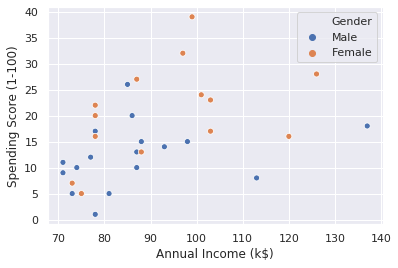

In [112]:
sns.scatterplot ( x = "Annual Income (k$)" , y ="Spending Score (1-100)" , data =  cluster_0 , hue = "Gender")

In [113]:
cluster_0["Gender"].value_counts()

Male      18
Female    14
Name: Gender, dtype: int64

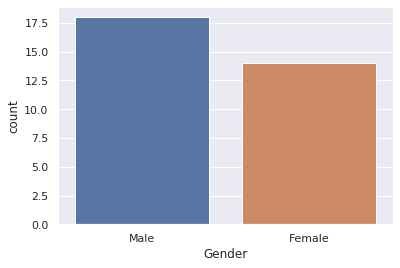

In [114]:
sns.countplot(x="Gender" ,  data = cluster_0 )

In [115]:
 percentage(18,14)

Percentage of males in above cluster :  56.25
Percentage of females in above cluster :  43.75
